## Introduction
- Analyzing traffic data

### Resources
- [Traffic Dataset](https://www.kaggle.com/datasets/hasibullahaman/traffic-prediction-dataset)

### Credits
- [Hasibullah Aman ](https://www.kaggle.com/hasibullahaman)


# Project

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# reading csv file, creating a dataframe named `df`
df = pd.read_csv('./dataset/Traffic.csv')

In [4]:
# Glance at DataFrame
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


## Analysis

In [5]:
# Some information about DataFrame structure and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [6]:
# Description about Dataset
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [7]:
# Checking for null values
df.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

### Time-Based Analysis

In [8]:
# Adding a datetime column to the DataFrame, combined as Time
df['Time'] = pd.to_datetime(df['Time'])

df.head()   # Glance at new column of the DataFrame

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,2023-12-11 00:00:00,10,Tuesday,31,0,4,4,39,low
1,2023-12-11 00:15:00,10,Tuesday,49,0,3,3,55,low
2,2023-12-11 00:30:00,10,Tuesday,46,0,3,6,55,low
3,2023-12-11 00:45:00,10,Tuesday,51,0,2,5,58,low
4,2023-12-11 01:00:00,10,Tuesday,57,6,15,16,94,normal


In [9]:
# Total Traffic count for a day
df.groupby(df['Time'].dt.date)['Traffic Situation'].value_counts()

Time        Traffic Situation
2023-12-11  normal               1669
            heavy                 682
            high                  321
            low                   304
Name: Traffic Situation, dtype: int64

In [10]:
# Total vehicles count, Day-wise
df['Day of the week'].value_counts()

Tuesday      480
Wednesday    480
Thursday     480
Friday       384
Saturday     384
Sunday       384
Monday       384
Name: Day of the week, dtype: int64

In [11]:
# Day-Wise Traffic situation count
df.groupby(df['Day of the week'])['Traffic Situation'].value_counts()

Day of the week  Traffic Situation
Friday           normal               170
                 low                  118
                 heavy                 96
Monday           normal               214
                 heavy                 86
                 high                  48
                 low                   36
Saturday         normal               234
                 heavy                 88
                 high                  39
                 low                   23
Sunday           normal               213
                 heavy                 81
                 high                  62
                 low                   28
Thursday         normal               282
                 heavy                108
                 high                  58
                 low                   32
Tuesday          normal               276
                 heavy                112
                 high                  55
                 low                   37

In [12]:
# Days-wise total number of vehicles and Traffic Situation
Columns=['CarCount','BikeCount','BusCount','TruckCount']
grouped_df = df.groupby('Day of the week')[Columns].sum()
print(grouped_df)

                 CarCount  BikeCount  BusCount  TruckCount
Day of the week                                           
Friday              26478       8452      3154        3896
Monday              25893       5064      6206        6213
Saturday            26446       5624      6151        6265
Sunday              26070       5290      6175        6378
Thursday            32704       6633      8027        7626
Tuesday             33426       6627      7816        7446
Wednesday           33424       6704      7943        7783


In [13]:
# Checking Maximum and Minimum value of Different Vehicles running in a particular day
list1=['CarCount','BikeCount','BusCount','TruckCount']
Max_Min = df.groupby('Day of the week')[list1].agg(['max', 'min'])

# Glance at Max & Min frequency of particular vehicle for a day
Max_Min

CarCount     BikeCount     BusCount     TruckCount    
                     max min       max min      max min        max min
Day of the week                                                       
Friday               180  10        70   0       30   0         40   0
Monday               150   6        40   0       50   0         40   0
Saturday             150   9        39   0       50   0         40   0
Sunday               150   7        40   0       50   0         39   0
Thursday             150   7        40   0       50   0         40   0
Tuesday              150   6        40   0       50   0         40   0
Wednesday            150   6        40   0       50   0         40   0

### Converting column's dtype

In [14]:
# Converting 'Traffic Situation' into Numeric form
df['Traffic Situation'] = df['Traffic Situation'].replace({'low':0, 'normal':1,
                                                              'heavy':2, 'high':3})

In [15]:
#Converting Days of weak into Numeric form
df2 = df.replace({'Day of the week':{'Monday':1,'Tuesday':2,
                                                          'Wednesday':3,'Thursday':4,
                                                          'Friday':5,'Saturday':6,
                                                          'Sunday':7}})

In [16]:
# Glance at DataFrame after Change column's dtype
df2.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,2023-12-11 00:00:00,10,2,31,0,4,4,39,0
1,2023-12-11 00:15:00,10,2,49,0,3,3,55,0
2,2023-12-11 00:30:00,10,2,46,0,3,6,55,0
3,2023-12-11 00:45:00,10,2,51,0,2,5,58,0
4,2023-12-11 01:00:00,10,2,57,6,15,16,94,1


In [17]:
# Changing number into alphabets
limit=50
df3=df.copy()
# Use numpy's where function to replace values based on conditions
df3['CarCount'] = np.where(df3['CarCount'] > limit, 'many', 'few')
df3['BikeCount'] = np.where(df3['BikeCount'] > limit, 'many', 'few')
df3['BusCount'] = np.where(df3['BusCount'] > limit, 'many', 'few')
df3['TruckCount'] = np.where(df3['TruckCount'] > limit, 'many', 'few')

In [18]:
# Glance at updated DataFrame
df3.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,2023-12-11 00:00:00,10,Tuesday,few,few,few,few,39,0
1,2023-12-11 00:15:00,10,Tuesday,few,few,few,few,55,0
2,2023-12-11 00:30:00,10,Tuesday,few,few,few,few,55,0
3,2023-12-11 00:45:00,10,Tuesday,many,few,few,few,58,0
4,2023-12-11 01:00:00,10,Tuesday,many,few,few,few,94,1


## Visualizing Data

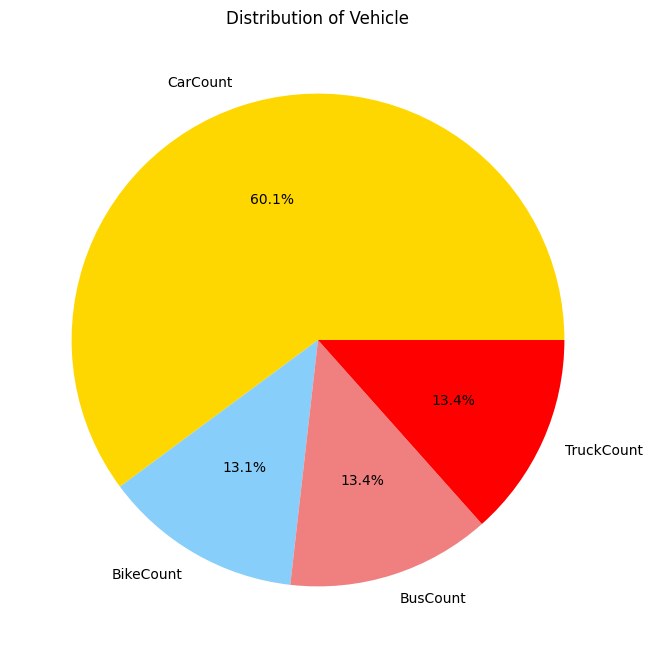

In [19]:
#Visualizing Data
Distribution_of_Vehicle = df[Columns].sum()
plt.figure(figsize=(8, 8))
plt.pie(Distribution_of_Vehicle, labels=['CarCount', 'BikeCount', 'BusCount','TruckCount'], autopct='%1.1f%%', colors=['gold', 'lightskyblue', 'lightcoral','red'])
plt.title('Distribution of Vehicle')
plt.show()

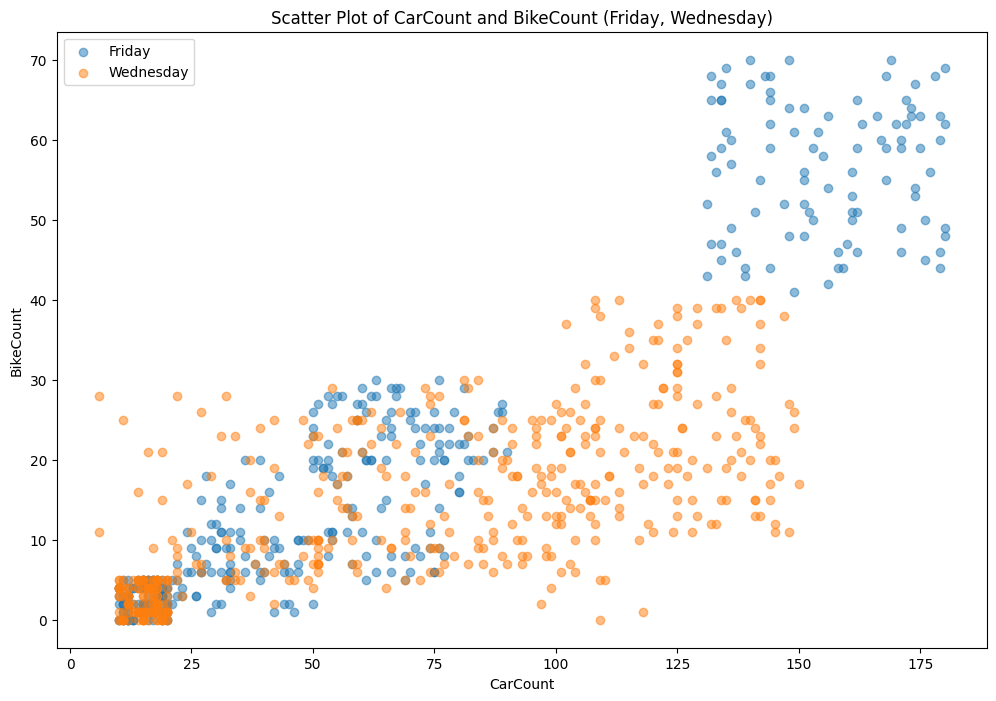

In [22]:
# Scatter Plot of CarCount and BikeCount, at peak & low days (Friday & Wednesday)
Day_of_Week=["CarCount","BusCount","TruckCount"]
plt.figure(figsize=(12, 8))
plt.scatter(df[df['Day of the week'] == 'Friday']['CarCount'],
             df[df['Day of the week'] == 'Friday']['BikeCount'],
            label='Friday', alpha=0.5)
plt.scatter(df[df['Day of the week'] == 'Wednesday']['CarCount'],
           df[df['Day of the week'] == 'Wednesday']['BikeCount'],
            label='Wednesday', alpha=0.5)
plt.title('Scatter Plot of CarCount and BikeCount (Friday, Wednesday)')
plt.xlabel('CarCount')
plt.ylabel('BikeCount')
plt.legend()
plt.show()

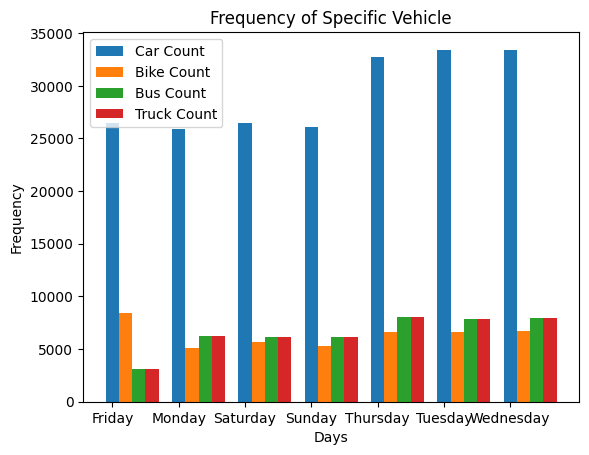

In [21]:
# Plot to determine frequency of specific vehicles by days of the week

# Grouping the DataFrame by days of the week
Columns=['CarCount','BikeCount','BusCount','TruckCount']
grouped_df = df.groupby('Day of the week')[Columns].sum()

fig, ax = plt.subplots()    # For creating subplots
x_positions = [0, 1, 2, 3, 4, 5, 6] # Defining total no of x_ticks
bar_width = 0.2 # width of the bar

# Total no of vehicles count days-wise, in form of an array
Car_count=np.array(grouped_df['CarCount'])
Bike_count=np.array(grouped_df['BikeCount'])
Bus_count=np.array(grouped_df['BusCount'])
Truck_count=np.array(grouped_df['TruckCount'])

# Days in the order of vehicle counts, stored in above array
days = ['Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday']

# Plotting bar for each vehicle
ax.bar(x_positions, Car_count, width=bar_width, label='Car Count')
ax.bar([x + bar_width for x in x_positions], Bike_count, width=bar_width, label='Bike Count')
ax.bar([x + 2*bar_width for x in x_positions], Bus_count, width=bar_width, label='Bus Count')
ax.bar([x + 3*bar_width for x in x_positions], Bus_count, width=bar_width, label='Truck Count')

ax.set_xticks(x_positions)  # defining x_ticks
ax.set_xticklabels(days)    # defining x_ticks labels
plt.title('Frequency of Specific Vehicle')
plt.xlabel('Days')
plt.ylabel('Frequency')

plt.legend()
plt.show()